# 1. 라이브러리

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set_style('whitegrid')

# 인코더 라이브러리 불러오기
from sklearn.preprocessing import LabelEncoder,PowerTransformer

# 경고창 무시
import warnings
warnings.filterwarnings("ignore")

# 2. 데이터 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
# Train 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Test 데이터 확인
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Train 요약통계량
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Test 요약통계량
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 3. 이상값 제거

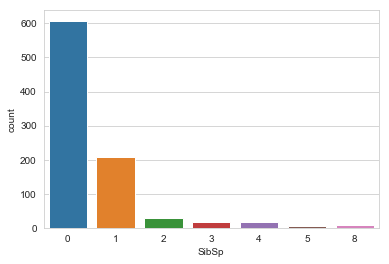

In [7]:
# SibSp(형제, 자매, 배우자의 수)가 이상하게 많은 데이터가 있음.... 이상값으로 판단하고 살펴본 다음, 제거하고 분석 진행

# 그래프를 보면, 대부분 0 또는 1이지만 5이상의 값도 존재하므로 더 살펴 볼 필요가 있음

sea.countplot(train['SibSp'])
plt.show()

In [8]:
# SibSp의 값을 확인해 본 결과 8인 값이 7개가 있었음
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
# SibSp가 높은 상위 10개의 데이터 확인
train.sort_values(by=['SibSp'],ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S


In [10]:
# Sage 가문은 모두 3등석 자리에 같은 티켓번호를 가지고 S 항구에서 탑승하였지만.... 전원 사망!
outliner_SibSp = train.loc[train['SibSp']==8]
outliner_SibSp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [11]:
# Sage 가문을 특이 케이스인, 이상값으로 판단하고 제거!
train = train.drop(outliner_SibSp.index,axis=0)

#### Fare(운임 요금)을 살펴보니 역시 심각한 이상값이 존재

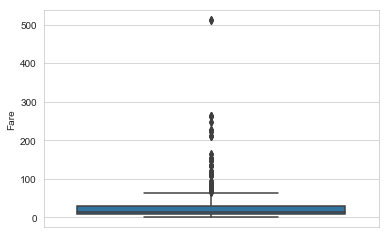

In [12]:
sea.boxplot(train['Fare'],orient='v')
plt.show()

In [13]:
# 데이터를 운임요금의 내림차순으로 정렬하고, 운임요금이 같을 경우 좌석 등급의 내림차순으로 정렬해서 상위 10개 데이터 확인
train.sort_values(by=['Fare','Pclass'],ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [14]:
# 이유를 알 수 없지만, 비상식적으로 높은 티켓값을 주고 탑승한 고객 역시 이상값으로 판단 후 제거
outliner_Fare = train.loc[train['Fare'] > 500]
outliner_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [15]:
# 변수 Fare의 이상값 제거
train = train.drop(outliner_Fare.index,axis=0)

In [16]:
# 제거가 된 후의 데이터 크기
print("Train Size :", train.shape)
print("Test Size :", test.shape)

Train Size : (881, 12)
Test Size : (418, 11)


# 4. Train과 Test 병합

In [17]:
dataset=pd.concat([train,test],ignore_index=True)

In [18]:
dataset.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


# 5. 결측값 확인

In [19]:
dataset=dataset.fillna(np.nan)
dataset.isnull().sum()

Age             256
Cabin          1006
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
# 딱 2개 있는 Embarked(승선 장소)가 결측값인 데이터 확인
dataset.loc[dataset['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


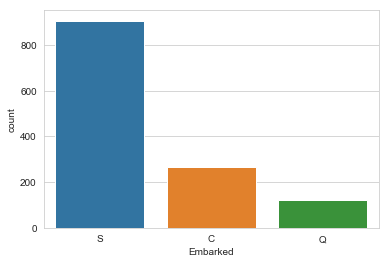

In [21]:
# Embakred의 비율 확인
sea.countplot(dataset['Embarked'])
plt.show()

In [22]:
# 2개의 결측값에 최빈값인 "S"를 부여
dataset['Embarked']=dataset['Embarked'].fillna('S')

In [23]:
# Fare(운임 요금)이 결측값인 데이터 확인
dataset.loc[dataset['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [24]:
# 좌석등급이 3등급인 인원 중에 Fare를 내림차순으로 정렬해서 상위 10개의 데이터
dataset.loc[(dataset['Pclass']==3)].sort_values(by=['Fare'],ascending=False).head(15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1069,NaN,NaN,S,69.5500,"Sage, Miss. Ada",2,1080,3,female,8,NaN,CA. 2343
1246,NaN,NaN,S,69.5500,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343
1241,14.5,NaN,S,69.5500,"Sage, Master. William Henry",2,1252,3,male,8,NaN,CA. 2343
1223,NaN,NaN,S,69.5500,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343
638,NaN,NaN,S,56.4958,"Foo, Mr. Choong",0,644,3,male,0,1.0,1601
920,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,931,3,male,0,NaN,1601
686,NaN,NaN,S,56.4958,"Lam, Mr. Ali",0,693,3,male,0,1.0,1601
74,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,75,3,male,0,1.0,1601
830,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,839,3,male,0,1.0,1601
818,NaN,NaN,S,56.4958,"Lam, Mr. Len",0,827,3,male,0,0.0,1601


In [25]:
# 인원중에 좌석등급이 3등급이고, 부모자식과 타지 않았으며, 형제, 자매 배우자도 없으며, 운임요금이 결측값이 아닌 데이터 중에서
# 운임요금을 기준으로 내림차순 정렬한 상위 6개의 데이터
temp = dataset.loc[(dataset['Pclass']==3)&(dataset['Parch']==0)&(dataset['SibSp']==0)&(dataset['Fare']>0)].sort_values(by=['Fare'],ascending=False)
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
830,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,839,3,male,0,1.0,1601
638,NaN,NaN,S,56.4958,"Foo, Mr. Choong",0,644,3,male,0,1.0,1601
168,28.0,NaN,S,56.4958,"Ling, Mr. Lee",0,170,3,male,0,0.0,1601
74,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,75,3,male,0,1.0,1601
504,26.0,NaN,S,56.4958,"Lang, Mr. Fang",0,510,3,male,0,1.0,1601


In [26]:
# Fare가 결측값인 하나의 데이터는 위의 설정한 같은 환경의 인원들의 평균 운임 요금을 적용
dataset['Fare']=dataset['Fare'].fillna(temp['Fare'].mean())

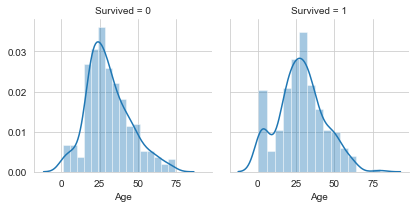

In [27]:
# 생존과 사망한 사람들의 나이 분포를 보면 나이가 생존 유무를 결정 짓는 매우 중요한 변수라는 것을 알 수 있음.
# 어린 아이들은 대부분 생존함.
g = sea.FacetGrid(train,col='Survived')
g = g.map(sea.distplot,'Age')

In [28]:
# Age(나이)가 결측값인 데이터의 개수 확인
nullAgeSubset = dataset.loc[dataset['Age'].isnull()]
nullAgeSubset.shape

(256, 12)

In [29]:
# 256개의 Age(나이) 변수 결측값 채우기

for index in nullAgeSubset.index :
    
    # Age가 결측값인 데이터와
    # Parch, SibSp, Pclass, Embarked, Sex 변수가 모두 같은 조건인 상태의 데이터들의 평균 나이를 게산
    ageSubsetMean = dataset['Age'].loc[(dataset['Parch'] == nullAgeSubset.loc[index]['Parch'])& \
                                       (dataset['SibSp'] == nullAgeSubset.loc[index]['SibSp'])& \
                                       (dataset['Pclass'] == nullAgeSubset.loc[index]['Pclass'])& \
                                       (dataset['Embarked'] == nullAgeSubset.loc[index]['Embarked'])& \
                                       (dataset['Sex'] == nullAgeSubset.loc[index]['Sex'])].mean()

    # 만약 위의 조건인 상태의 평균 나이가 게산이 된다면(5개의 조건이 모두 같은 사람이 한명이라도 있다면...)
    # 위에서 계산한 평균값으로 나이를 대체
    if(ageSubsetMean > 0) :
        
        dataset['Age'].loc[index] = ageSubsetMean
        
    else :
        
        # 만약 저 5개의 조건이 같은 사람이 없다면....
        # Parch, sibSp, Pclass, Embarked 의 4개 조건이 같은 상태의 사람들의 평균 나이를 계산
        ageSubsetMean = dataset['Age'].loc[(dataset['Parch'] == nullAgeSubset.loc[index]['Parch'])& \
                                           (dataset['SibSp']==nullAgeSubset.loc[index]['SibSp'])& \
                                           (dataset['Pclass']==nullAgeSubset.loc[index]['Pclass'])& \
                                           (dataset['Embarked']==nullAgeSubset.loc[index]['Embarked'])].mean()
        
        # 위와 동일하게 나이 대체
        if(ageSubsetMean > 0):
            
            dataset['Age'].loc[index] = ageSubsetMean
        
        else :
            
            # 만약 4개의 조건이 같은 사람이 없다면...
            # Parch, SibSp, Pclass 3개의 조건이 같은 사람들의 평균 나이를 계산
            ageSubsetMean = dataset['Age'].loc[(dataset['Parch']==nullAgeSubset.loc[index]['Parch'])& \
                                               (dataset['SibSp']==nullAgeSubset.loc[index]['SibSp'])& \
                                               (dataset['Pclass']==nullAgeSubset.loc[index]['Pclass'])].mean()
             
            # 위의 계산한 값을 대입   
            if(ageSubsetMean > 0) :
                
                dataset['Age'].loc[index] = ageSubsetMean
            
            else :
                
                # 만약 3개 조건이 같은 살마잉 없다면....
                # 전체 데이터의 평균을 계산해서 대입
                dataset['Age'].loc[index]=dataset['Age'].mean()

In [30]:
# Age(나이) 변수의 결측값이 남아 있는지 확인
dataset['Age'].isnull().sum()

0

# 6. 탐색적 데이터 분석

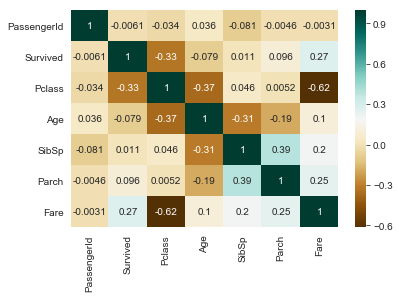

In [31]:
# 각 변수들간의 상관계수 확인
sea.heatmap(train.corr(),cmap='BrBG',annot=True)
plt.show()

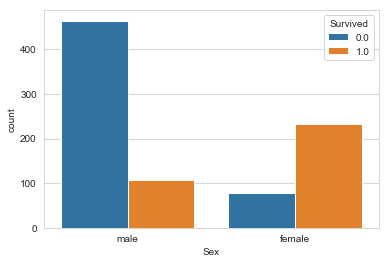

In [32]:
# 성별에 따른 생존 유무의 비율 차이 확인
sea.countplot(dataset['Sex'],hue=dataset['Survived'])
plt.show()

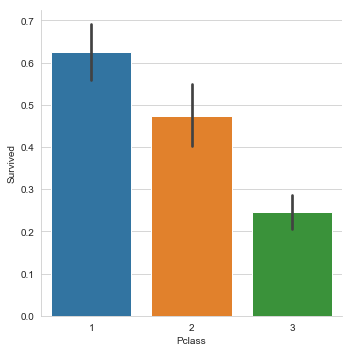

In [33]:
# 좌석 등급에 따른 생존자 수 차이 확인
sea.catplot(data=dataset,x='Pclass',y='Survived',kind='bar')
plt.show()

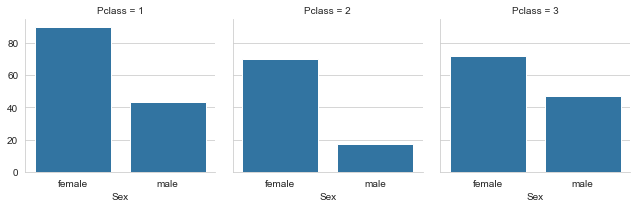

In [34]:
# 좌석 등급에 따른 남녀 비율 확인
g = sea.FacetGrid(data=dataset.loc[dataset['Survived']==1],col='Pclass')
g = g.map(sea.countplot,'Sex')

In [35]:
# train과 test가 합쳐져 있는 데이터셋
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


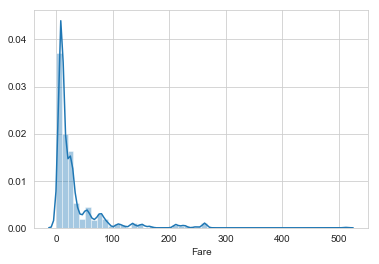

In [36]:
# 데이터셋에서 Fare(운임 요금)의 분포 형태 확인
# 데이터 분포의 형태가 매우 치우쳐진 분포
sea.distplot(np.array(dataset['Fare']).reshape(-1,1),axlabel='Fare')
plt.show()

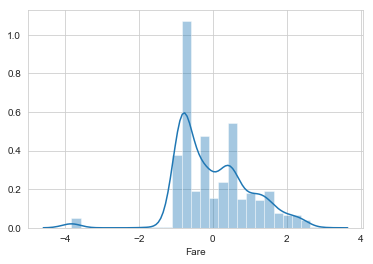

In [37]:
# powertransform을 통해 람다를 찾고, 정규성을 만족시키기 위해 변환
sea.distplot(PowerTransformer().fit_transform(np.array(dataset['Fare']).reshape(-1,1)),axlabel='Fare')
plt.show()

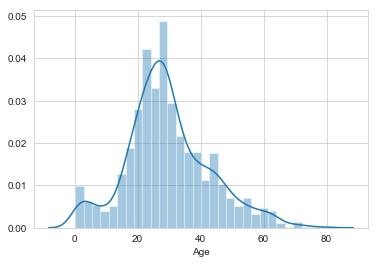

In [38]:
# 데이터셋의 Age(나이) 분포 확인
sea.distplot(np.array(dataset['Age']).reshape(-1,1),axlabel='Age')
plt.show()

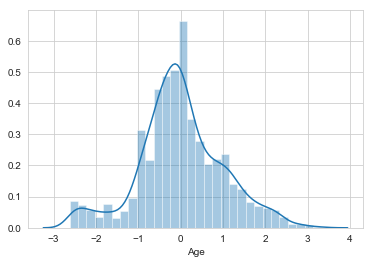

In [39]:
# Age(나이) 분포 역시 PowerTransformer를 이용해 변환 
sea.distplot(PowerTransformer().fit_transform(np.array(dataset['Age']).reshape(-1,1)),axlabel='Age')
plt.show()

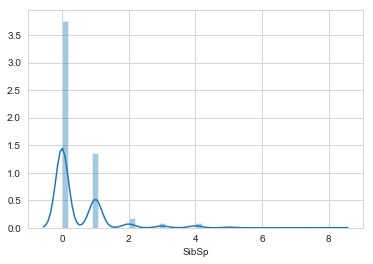

In [40]:
# 데이터셋의 SibSp(형제, 자매, 배우자의 수) 분포 확인
sea.distplot(np.array(dataset['SibSp']).reshape(-1,1),axlabel='SibSp')
plt.show()

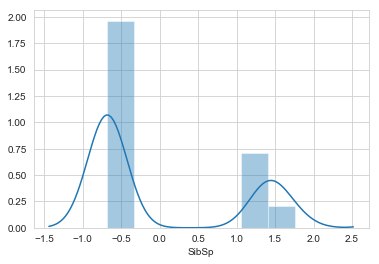

In [41]:
# 데이터셋의 SibSp(형제, 자매, 배우자의 수) 역시 변환
sea.distplot(PowerTransformer().fit_transform(np.array(dataset['SibSp']).reshape(-1,1)),axlabel='SibSp')
plt.show()

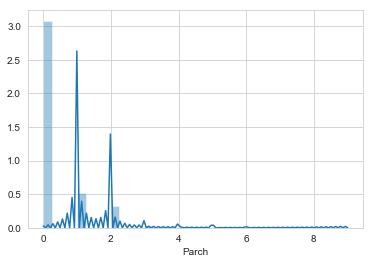

In [42]:
# 데이터셋의 Parch(부모, 자식의 수) 분포 확인
sea.distplot(np.array(dataset['Parch']).reshape(-1,1),axlabel='Parch')
plt.show()

# 7. 데이터 전처리

In [43]:
# 모델에 불필요한 변수 제거
# Cabin : 결측값이 너무 많음.
# Name : 문자열 변수 제거
# PassengerId : 인덱스 변수 제거
# Ticket : 문자열 변수 제거
X = dataset.drop(['Cabin','Name','PassengerId','Survived','Ticket'],axis=1)
Y = dataset['Survived']

In [44]:
X.head(10)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0
3,35.0,S,53.1000,0,1,female,1
4,35.0,S,8.0500,0,3,male,0
5,32.7,Q,8.4583,0,3,male,0
6,54.0,S,51.8625,0,1,male,0
7,2.0,S,21.0750,1,3,male,3
8,27.0,S,11.1333,2,3,female,0
9,14.0,C,30.0708,0,2,female,1


In [45]:
# 치우쳐진 형태의 데이터들에 Powertranformer 적용
X['Age'] = PowerTransformer().fit_transform(np.array(X['Age']).reshape(-1,1))
X['Fare'] = PowerTransformer().fit_transform(np.array(X['Fare']).reshape(-1,1))
X['Parch'] = PowerTransformer().fit_transform(np.array(X['Parch']).reshape(-1,1))
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['SibSp'] = PowerTransformer().fit_transform(np.array(X['SibSp']).reshape(-1,1))

# Pclass(좌석 등급), Embarked(승선 장소) 변수를 더미 변수(원-핫 인코딩)으로 생성
dummyPclass = pd.get_dummies(X['Pclass'],prefix='Pclass')
dummyEmbarked = pd.get_dummies(X['Embarked'],prefix='Embarked')

# 기존의 Pclass와 Embarked를 제거하고 새로 만든 변수를 추가
X = pd.concat([X.drop(['Pclass','Embarked'],axis=1),dummyPclass,dummyEmbarked],axis=1)

In [46]:
# 데이터 전처리 과정을 거친 데이터셋
X.head(10)

,Age,Fare,Parch,Sex,SibSp,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.528294,-0.900492,-0.546620,1,1.402079,0,0,1,0,0,1
1,0.649084,1.349271,-0.546620,0,1.402079,1,0,0,1,0,0
2,-0.220282,-0.806910,-0.546620,0,-0.678731,0,0,1,0,0,1
3,0.438189,1.085747,-0.546620,0,1.402079,1,0,0,0,0,1
4,0.438189,-0.790463,-0.546620,1,-0.678731,0,0,1,0,0,1
5,0.273828,-0.738485,-0.546620,1,-0.678731,0,0,1,0,1,0
6,1.719709,1.064253,-0.546620,1,-0.678731,1,0,0,0,0,1
7,-2.374615,0.201880,1.780371,1,1.709946,0,0,1,0,0,1
8,-0.144927,-0.450870,1.886630,0,-0.678731,0,0,1,0,0,1
9,-1.184555,0.551637,-0.546620,0,1.402079,0,1,0,1,0,0


# 8. 기계학습

In [47]:
# 기계학습에 필요한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [48]:
# 
X_pro=PolynomialFeatures(degree=2).fit_transform(X)

In [49]:
# 
trainDataX = X_pro[:train.shape[0]]
trainDataY = Y[:train.shape[0]].astype('int32')
testDataX = X_pro[train.shape[0]:]

In [50]:
# Train : Test = 90% : 10% 의 비율로 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(trainDataX, trainDataY, test_size=0.1, random_state=47)

# 9. Test 데이터 예측

In [51]:
# 모델 생성
# XGBoost 기반 모델 사용

# 하이퍼 파라미터
# 학습률(learning_rage) = 0.001
# Tree 개수(n_estimators) = 300 개
# 최대 깊이(max_depth) = 30 
model=XGBClassifier(learning_rate=0.001, n_estimators=300, max_depth=30)

# 모델 적합
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
# Train 정확도
accuracy_score(Y_train,model.predict(X_train))

0.9002525252525253

In [53]:
# Test 정확도
accuracy_score(Y_test,model.predict(X_test))

0.9101123595505618